<a href="https://colab.research.google.com/github/viditagg2005/BYOP-24/blob/main/Data_Loading_%26_Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing Libraries**
Code to import libraries and get the dataset. Change the folder paths to match your folder and dataset paths.

In [ ]:
!pip install ultralytics
import cv2
import numpy as np

import ultralytics
from ultralytics import YOLO

import PIL.Image as Image
import os

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 705.0/705.0 kB 3.8 MB/s eta 0:00:00


In [ ]:
from google.colab import drive         ## if the project folder is on the local machine, you may ignore this cell
drive.mount('/content/drive/')


Mounted at /content/drive/


In [ ]:
path_project_folder = '/content/drive/MyDrive/Helmet Detection System'   ## change this path to your project folder path
os.chdir(path_project_folder)

path_dataset1_config = os.path.join(path_project_folder,'Dataset1/data.yaml')  #path for the configuration files of the datasets
path_dataset2_config = os.path.join(path_project_folder,'Dataset2/data.yaml')

#**Training the model**

Training on Dataset 1

In [ ]:
model = YOLO('yolov8m.pt')
model.train(data = path_dataset1_config ,epochs =30)

In [ ]:
path_partially_trained_model = os.path.join(path_project_folder,'runs/detect/train/weights/best.pt')  # if you retrained the model then provide the correct train folder path here

In [ ]:
model = YOLO(path_partially_trained_model)

Performing Hyperparameter Tuning

In [ ]:
model.tune(data= path_dataset1_config , epochs=3, iterations=10, optimizer='AdamW', plots=True, save=True, val=False)

Tuner: Initialized Tuner instance with 'tune_dir=runs/detect/tune3'
Tuner: 💡 Learn about tuning at https://docs.ultralytics.com/guides/hyperparameter-tuning
Tuner: Starting iteration 1/10 with hyperparameters: {'lr0': 0.01, 'lrf': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'box': 7.5, 'cls': 0.5, 'dfl': 1.5, 'hsv_h': 0.015, 'hsv_s': 0.7, 'hsv_v': 0.4, 'degrees': 0.0, 'translate': 0.1, 'scale': 0.5, 'shear': 0.0, 'perspective': 0.0, 'flipud': 0.0, 'fliplr': 0.5, 'mosaic': 1.0, 'mixup': 0.0, 'copy_paste': 0.0}
Saved runs/detect/tune3/tune_scatter_plots.png
Saved runs/detect/tune3/tune_fitness.png

Tuner: 1/10 iterations complete ✅ (410.96s)
Tuner: Results saved to runs/detect/tune3
Tuner: Best fitness=0.58761 observed at iteration 1
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.8188, 'metrics/recall(B)': 0.79497, 'metrics/mAP50(B)': 0.86349, 'metrics/mAP50-95(B)': 0.55695, 'val/box_loss': 1.31814, 'val/cls_loss': 0.8689, 'v

Training on Dataset 2

In [ ]:
model.train(data = path_dataset2_config,epochs =30, lr0 = 0.00714, lrf= 0.0116,momentum = 0.87808 ,weight_decay = 0.00053,warmup_epochs =2.52312,warmup_momentum=0.5596) ## these values are based on the values obtained in above hyperparameter tuning

Ultralytics YOLOv8.1.6 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/Helmet Detection System/runs/detect/train/weights/best.pt, data=/content/drive/MyDrive/Helmet Detection System/Dataset2/data.yaml, epochs=30, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, 

100%|██████████| 755k/755k [00:00<00:00, 23.5MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics.nn.modules.conv.Conv             [384

train: Scanning /content/drive/.shortcut-targets-by-id/1Anur8bDMxmr9mPDsK2OVtAj3h9rdXtyU/Helmet Detection System/Dataset2/train/labels... 3648 images, 13 backgrounds, 0 corrupt: 100%|██████████| 3648/3648 [24:29<00:00,  2.48it/s]


train: New cache created: /content/drive/.shortcut-targets-by-id/1Anur8bDMxmr9mPDsK2OVtAj3h9rdXtyU/Helmet Detection System/Dataset2/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/.shortcut-targets-by-id/1Anur8bDMxmr9mPDsK2OVtAj3h9rdXtyU/Helmet Detection System/Dataset2/valid/labels... 372 images, 1 backgrounds, 0 corrupt: 100%|██████████| 372/372 [02:24<00:00,  2.58it/s]


val: New cache created: /content/drive/.shortcut-targets-by-id/1Anur8bDMxmr9mPDsK2OVtAj3h9rdXtyU/Helmet Detection System/Dataset2/valid/labels.cache
Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      6.85G      1.202     0.7236       1.28         43        640: 100%|██████████| 228/228 [02:10<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:08<00:00,  1.38it/s]

                   all        372        660       0.89      0.907      0.944      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      7.01G      1.249     0.7662      1.307         54        640: 100%|██████████| 228/228 [02:08<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.65it/s]

                   all        372        660      0.877      0.896      0.926      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      7.02G      1.273     0.7903      1.315         47        640: 100%|██████████| 228/228 [02:04<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.80it/s]

                   all        372        660      0.837      0.867      0.896      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      7.04G      1.272     0.7936      1.319         47        640: 100%|██████████| 228/228 [02:04<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.87it/s]

                   all        372        660       0.85      0.849       0.91      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      7.05G      1.249     0.7755      1.297         54        640: 100%|██████████| 228/228 [02:03<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.61it/s]

                   all        372        660      0.876      0.865       0.92      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      7.03G      1.228     0.7502      1.287         42        640: 100%|██████████| 228/228 [02:04<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.85it/s]

                   all        372        660      0.871       0.84      0.909      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      7.05G      1.209     0.7437       1.27         60        640: 100%|██████████| 228/228 [02:04<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.65it/s]

                   all        372        660       0.86      0.883      0.923        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30       7.1G      1.187     0.7096      1.267         40        640: 100%|██████████| 228/228 [02:05<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.62it/s]

                   all        372        660      0.881      0.862      0.928      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      7.07G      1.162     0.6833      1.251         44        640: 100%|██████████| 228/228 [02:04<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.71it/s]

                   all        372        660      0.883      0.879      0.931      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      7.05G      1.136     0.6649      1.227         47        640: 100%|██████████| 228/228 [02:02<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.82it/s]

                   all        372        660      0.862      0.867       0.92      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30       7.1G      1.126     0.6427      1.218         53        640: 100%|██████████| 228/228 [02:03<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.64it/s]

                   all        372        660      0.849      0.865      0.902      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      7.09G      1.111     0.6431      1.218         43        640: 100%|██████████| 228/228 [02:03<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.76it/s]

                   all        372        660      0.901      0.862       0.93      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      7.05G      1.062     0.6075      1.191         49        640: 100%|██████████| 228/228 [02:03<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.66it/s]

                   all        372        660      0.876      0.881      0.925      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      7.07G      1.044     0.5967      1.179         32        640: 100%|██████████| 228/228 [02:02<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.65it/s]

                   all        372        660      0.869      0.856      0.915      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      7.07G      1.036     0.5901      1.163         34        640: 100%|██████████| 228/228 [02:04<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.85it/s]

                   all        372        660      0.875      0.888      0.927      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      7.07G      1.015     0.5721      1.158         63        640: 100%|██████████| 228/228 [02:04<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.66it/s]

                   all        372        660       0.88      0.883      0.924      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      7.09G     0.9913     0.5611      1.151         62        640: 100%|██████████| 228/228 [02:04<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.62it/s]

                   all        372        660      0.888      0.875      0.929      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      7.08G     0.9537     0.5285      1.124         50        640: 100%|██████████| 228/228 [02:04<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.84it/s]

                   all        372        660      0.899      0.859       0.93      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      7.05G     0.9451       0.53      1.117         35        640: 100%|██████████| 228/228 [02:05<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.79it/s]

                   all        372        660      0.887       0.88      0.938      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      7.06G     0.9137     0.5066      1.102         38        640: 100%|██████████| 228/228 [02:06<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.66it/s]

                   all        372        660      0.854      0.914      0.932      0.608


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      7.04G     0.8684     0.4501      1.108         27        640: 100%|██████████| 228/228 [02:05<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.63it/s]

                   all        372        660      0.885      0.877      0.933      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      7.05G     0.8427     0.4234      1.082         37        640: 100%|██████████| 228/228 [02:01<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.84it/s]

                   all        372        660      0.855      0.895      0.924      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      7.04G     0.8155     0.4095      1.069         25        640: 100%|██████████| 228/228 [02:02<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.65it/s]

                   all        372        660      0.901      0.872      0.924      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      7.04G     0.7933     0.4052      1.059         27        640: 100%|██████████| 228/228 [02:02<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.90it/s]

                   all        372        660       0.88       0.88      0.928      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      7.03G     0.7675     0.3825      1.042         36        640: 100%|██████████| 228/228 [02:01<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.62it/s]

                   all        372        660      0.897      0.878      0.927      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      7.04G     0.7435     0.3759      1.023         42        640: 100%|██████████| 228/228 [02:01<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.72it/s]

                   all        372        660      0.899      0.879      0.928      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      7.06G     0.7223     0.3636      1.014         22        640: 100%|██████████| 228/228 [02:02<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.82it/s]

                   all        372        660      0.898      0.865       0.93      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      7.05G     0.6992     0.3506     0.9989         36        640: 100%|██████████| 228/228 [02:02<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.77it/s]

                   all        372        660      0.883      0.882       0.93      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      7.06G     0.6728     0.3352     0.9818         28        640: 100%|██████████| 228/228 [02:02<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.69it/s]

                   all        372        660      0.905      0.849      0.929      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      7.05G      0.656     0.3246     0.9774         35        640: 100%|██████████| 228/228 [02:02<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:08<00:00,  1.38it/s]

                   all        372        660      0.859      0.897      0.926      0.614



30 epochs completed in 1.113 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 52.0MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics YOLOv8.1.6 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:12<00:00,  1.02s/it]


                   all        372        660       0.89      0.907      0.944      0.644
           With Helmet        372        338      0.895      0.979      0.972      0.722
        Without Helmet        372        322      0.885      0.835      0.916      0.566
Speed: 0.4ms preprocess, 11.7ms inference, 0.0ms loss, 4.9ms postprocess per image
Results saved to runs/detect/train3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x793365457d30>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

#**Training Results**

In [ ]:
results_path = os.path.join(path_project_folder,'runs/detect/train3')   ## again, if additional / retraining is done, change the train folder path
results_path

'/content/drive/MyDrive/Helmet Detection System/runs/detect/train3'

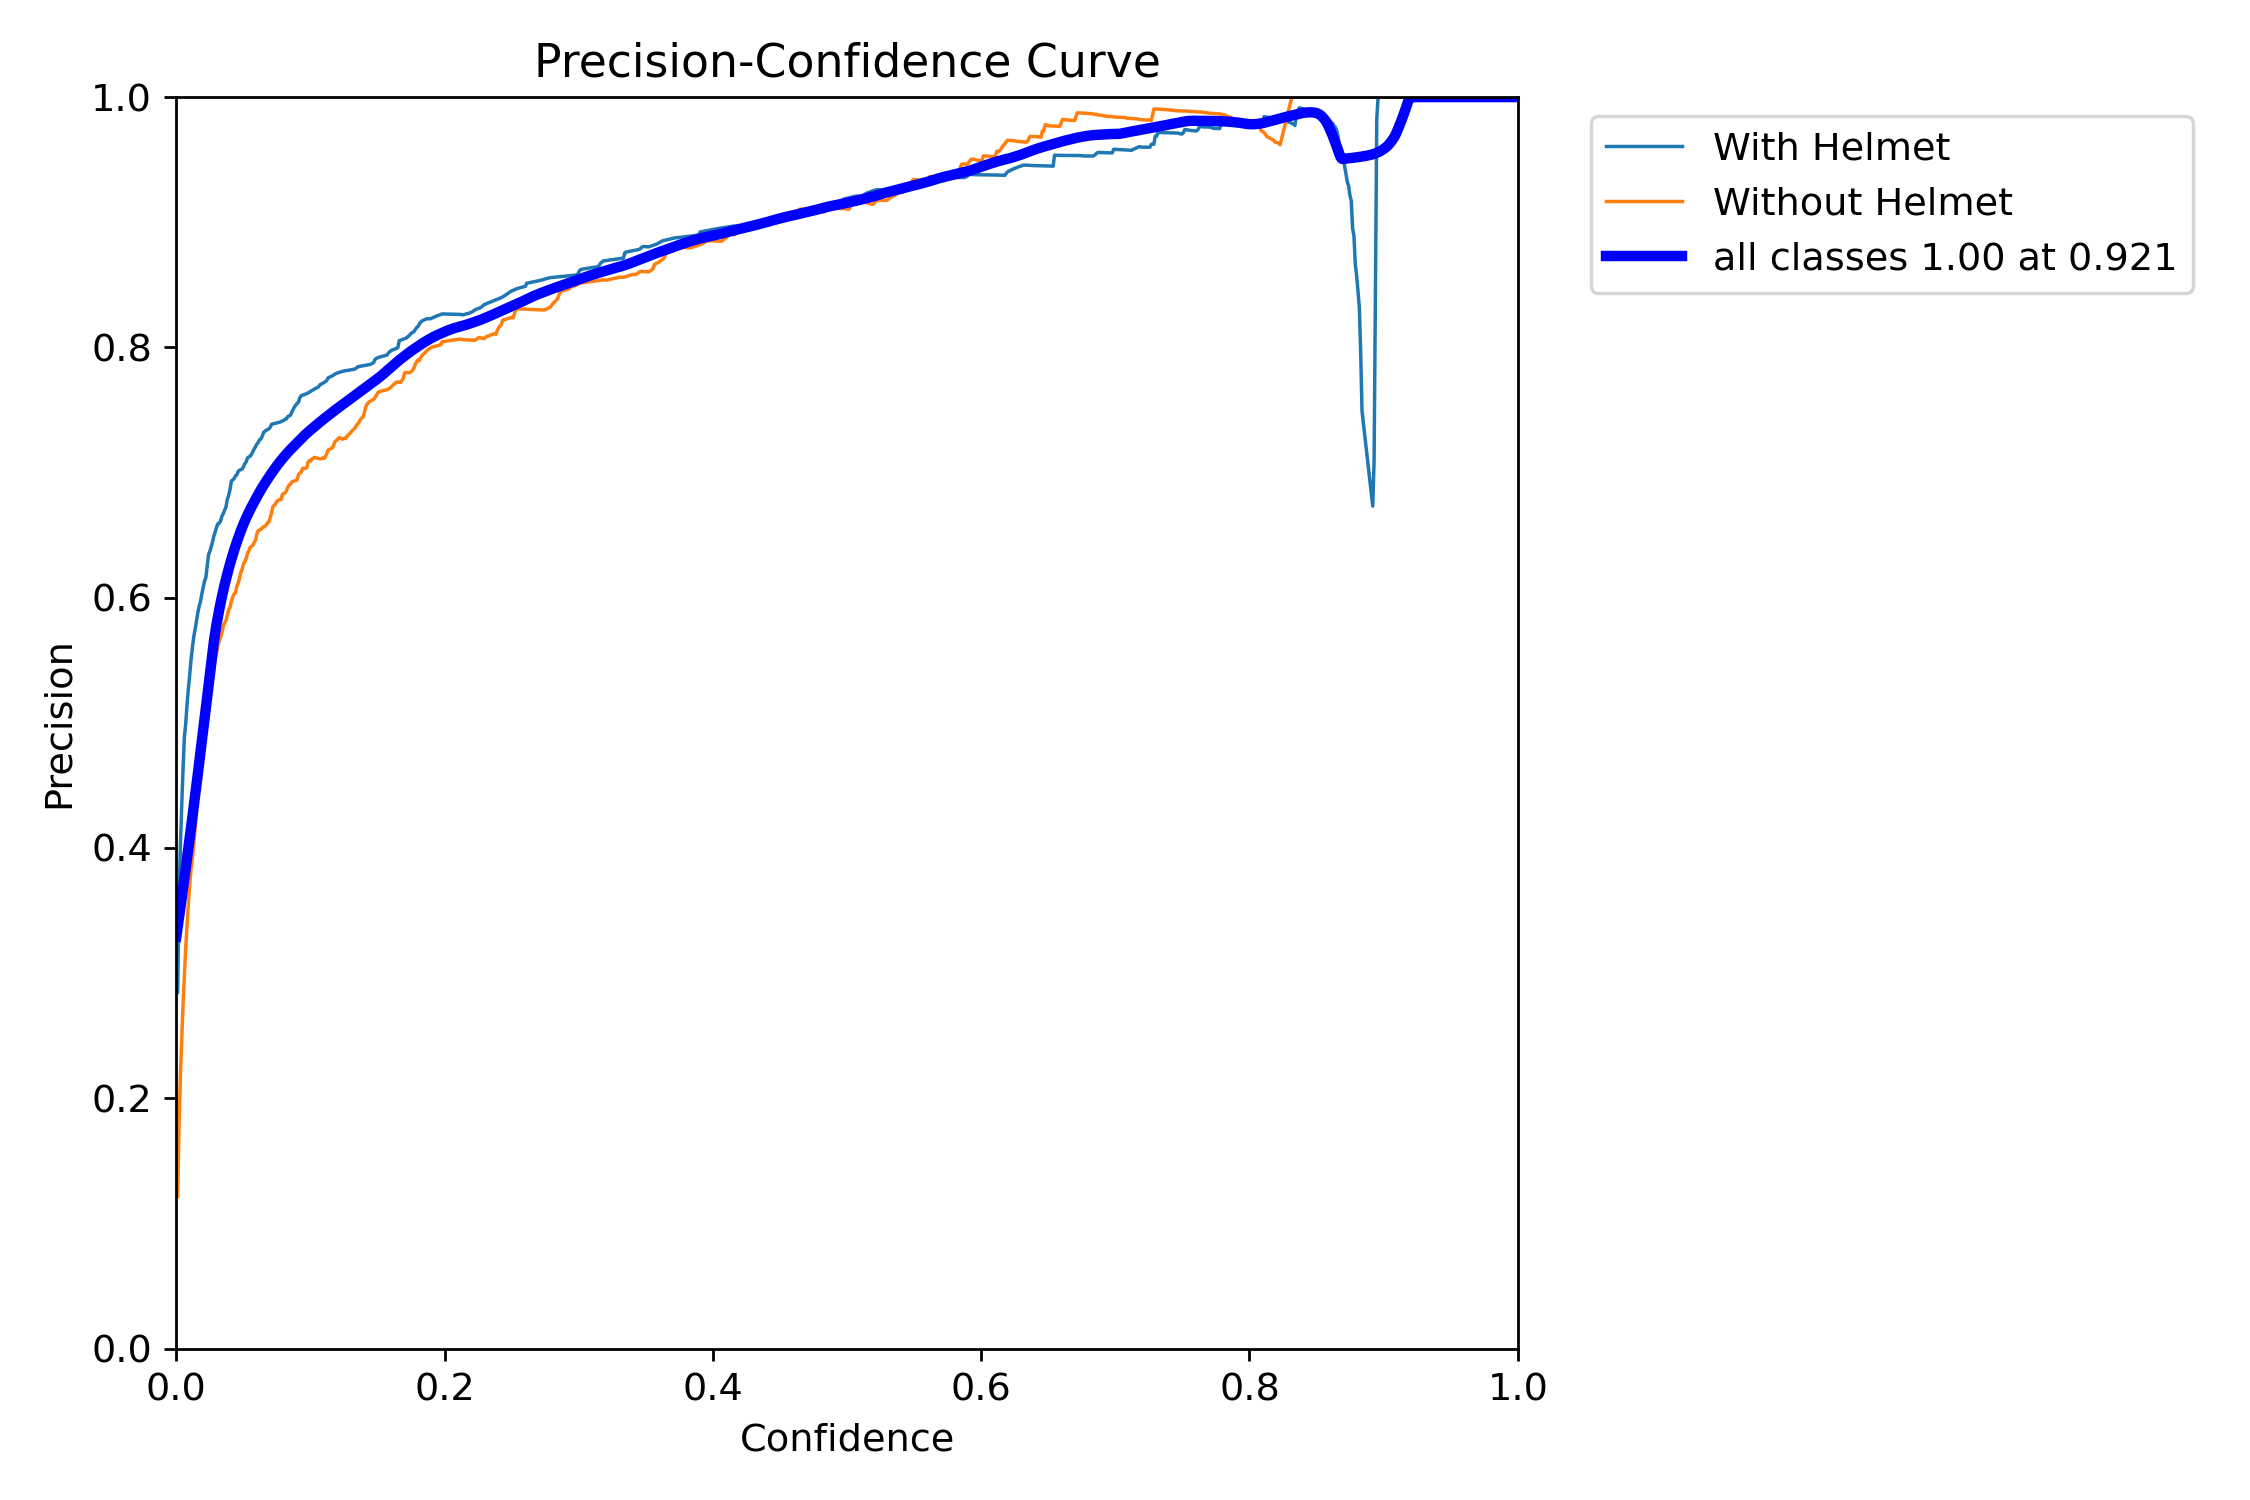

In [ ]:
from IPython.display import Image, display
Image(filename = os.path.join(results_path,'P_curve.png'), width = 700,height = 500)

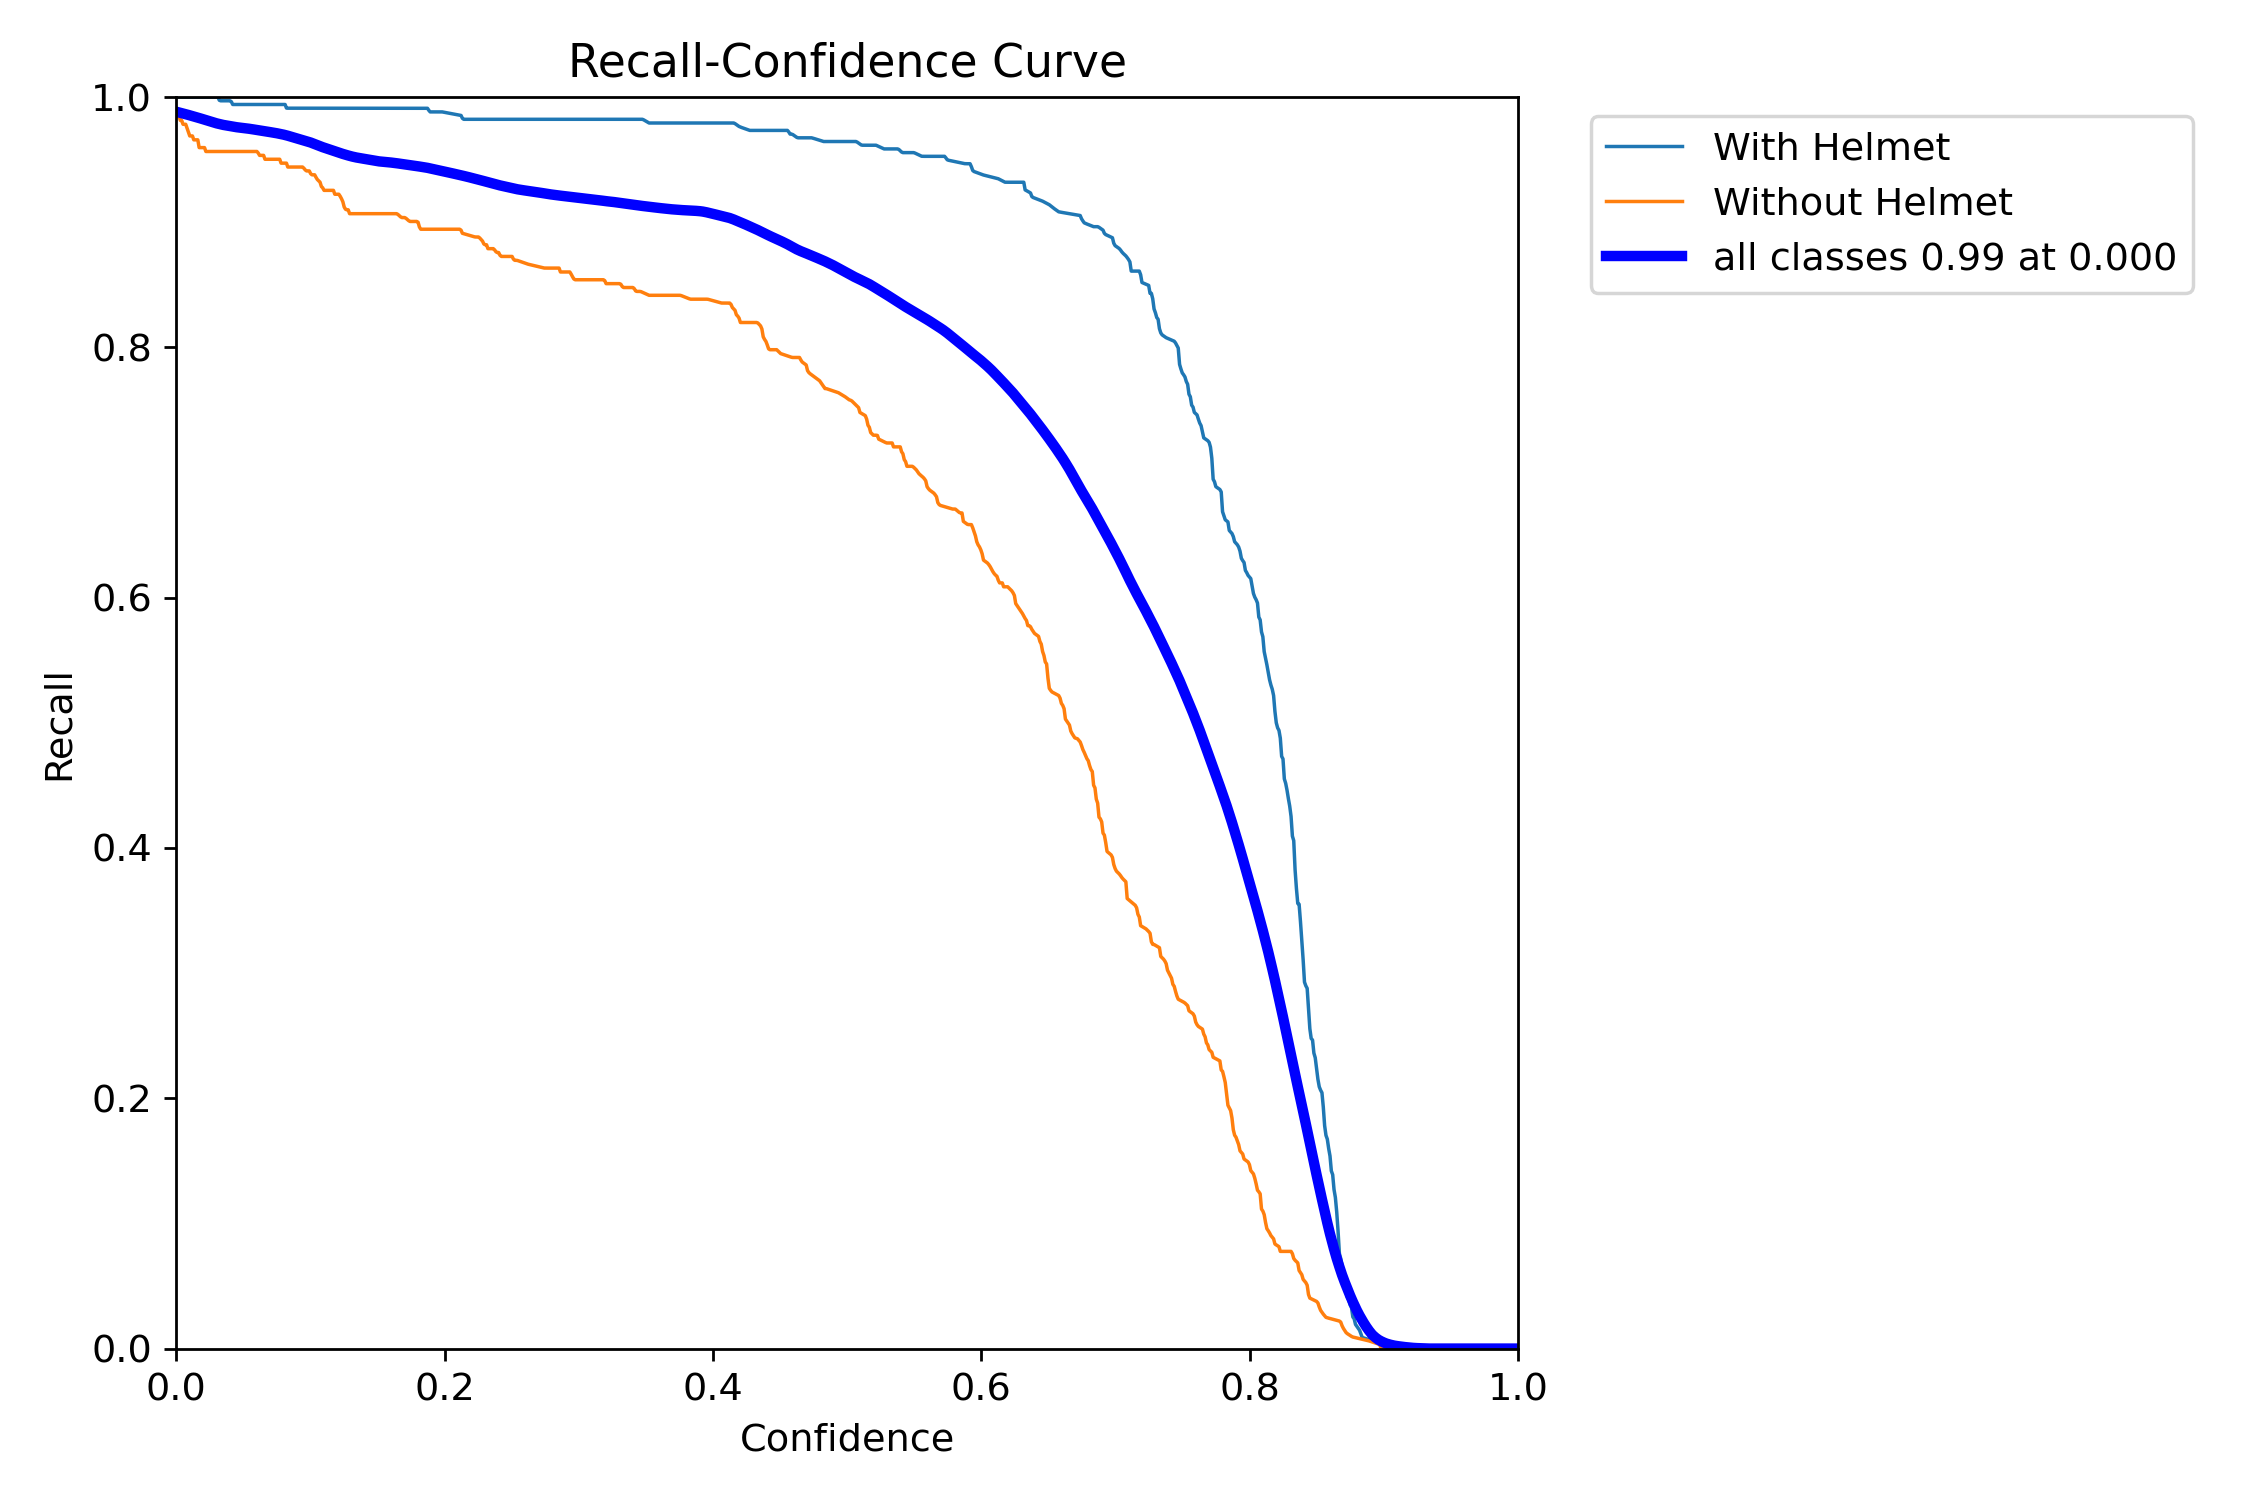

In [ ]:
Image(filename = os.path.join(results_path,'R_curve.png'),width =700,height = 500)

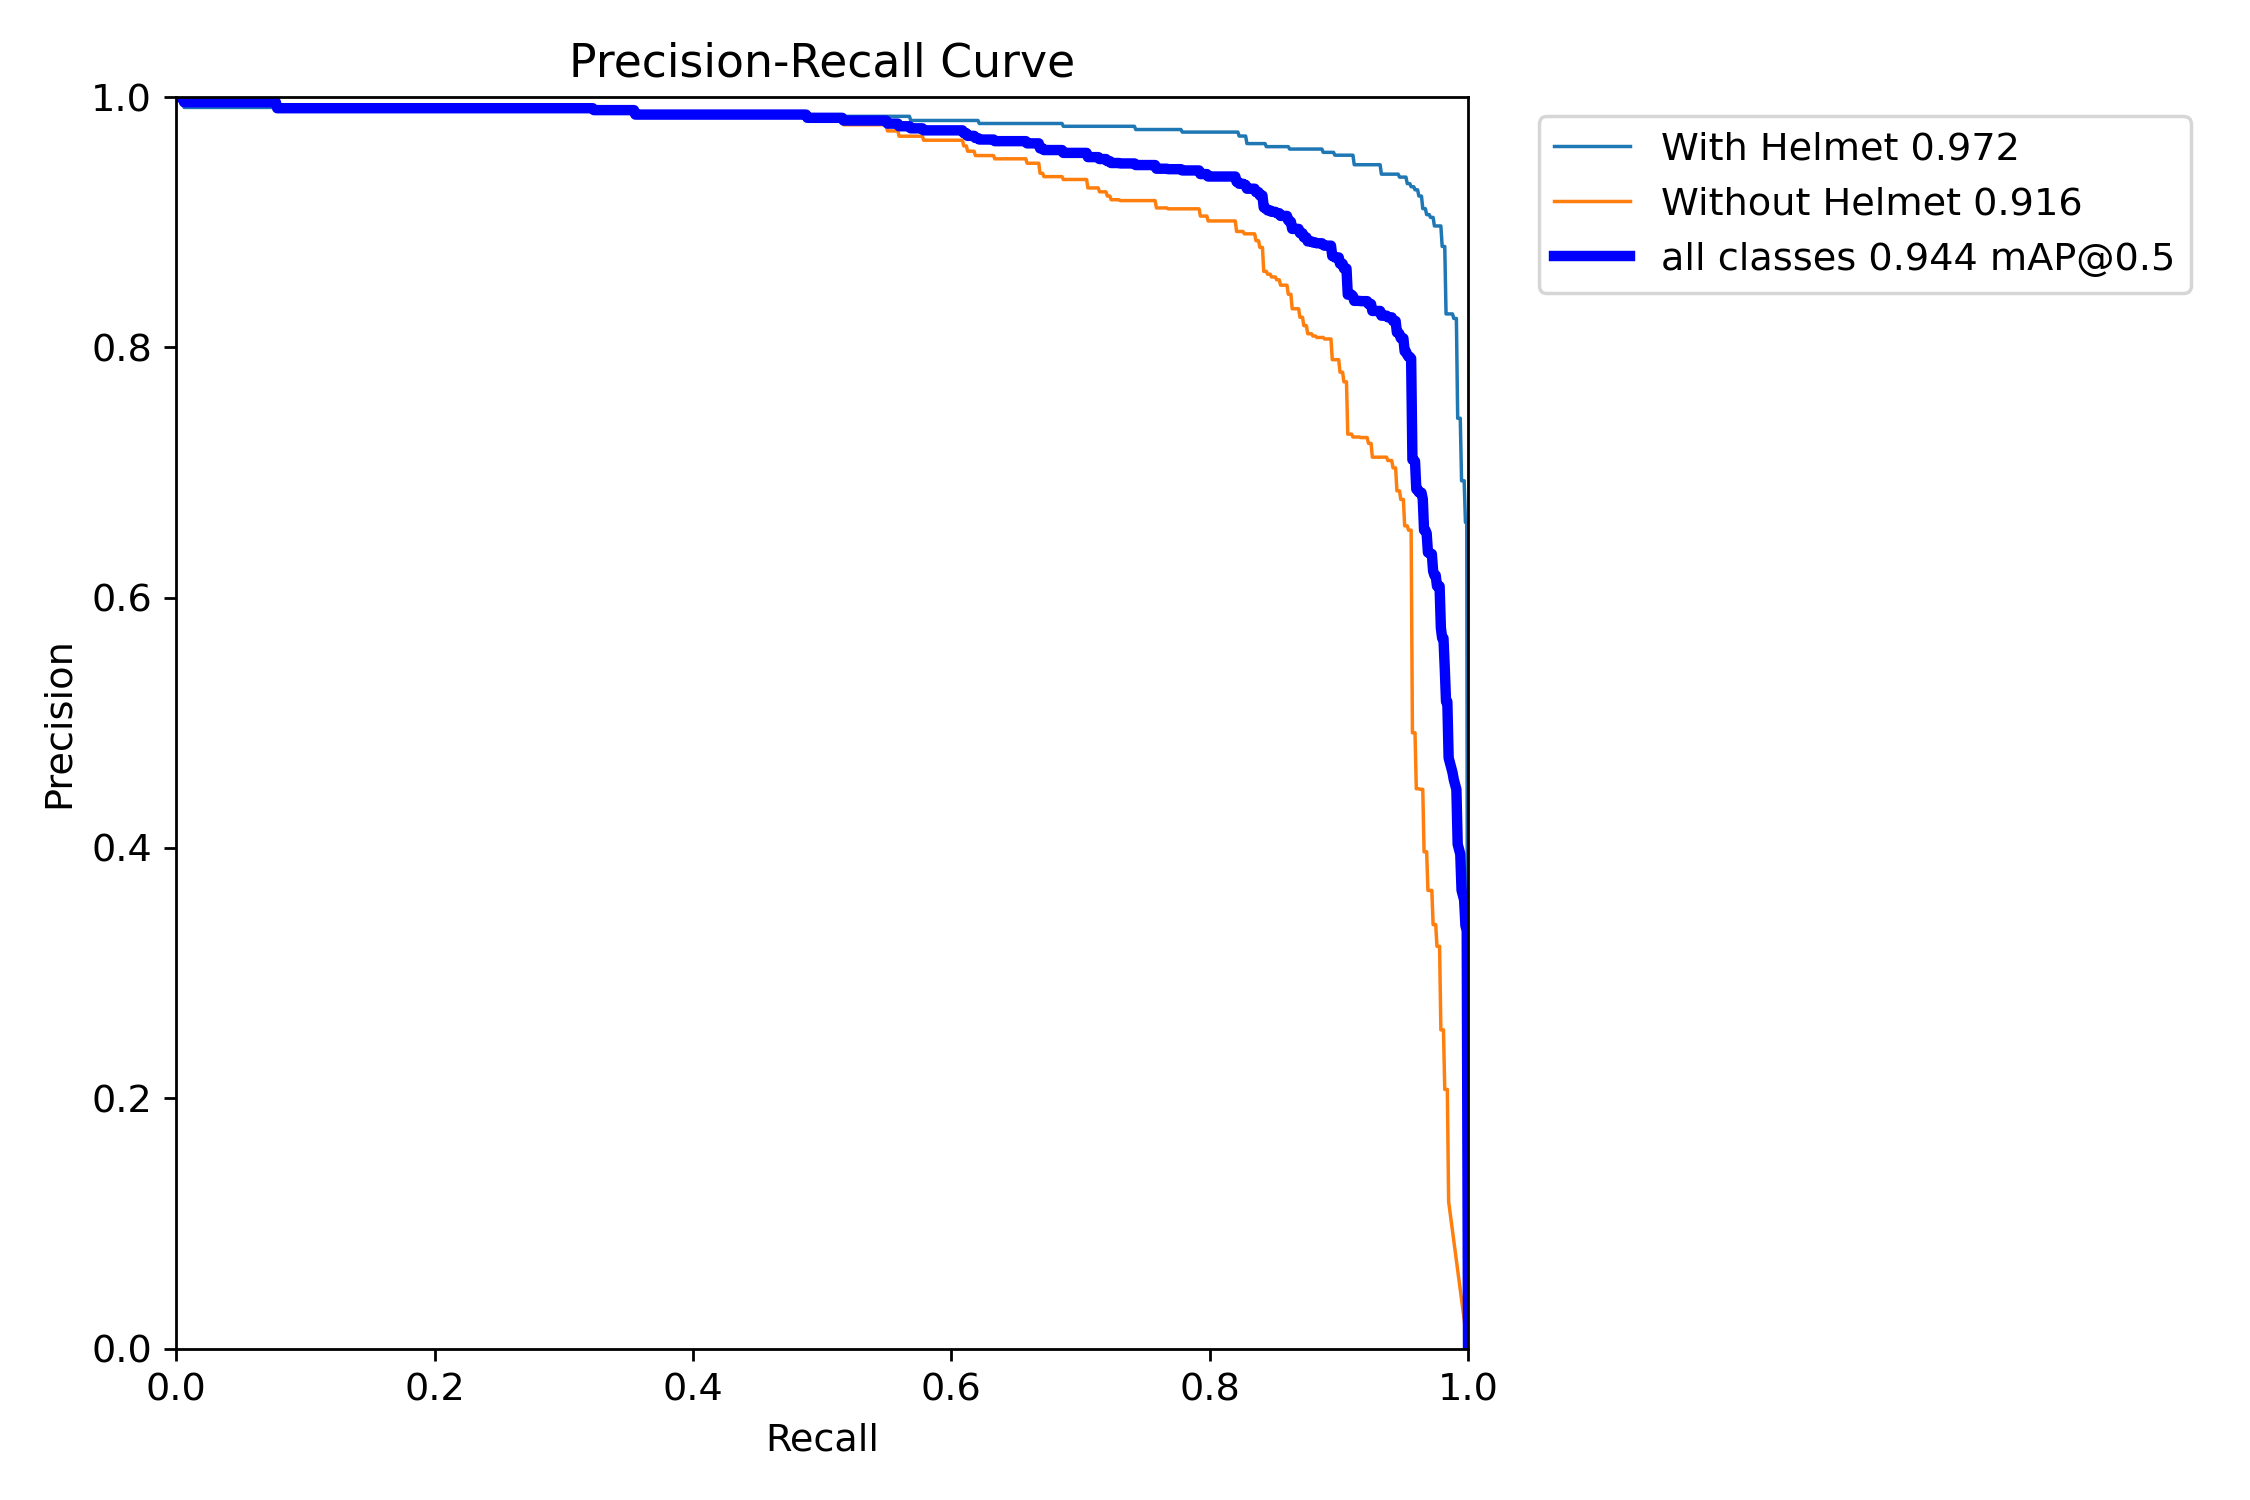

In [ ]:
Image(filename = os.path.join(results_path,'PR_curve.png'),width =700,height = 500)

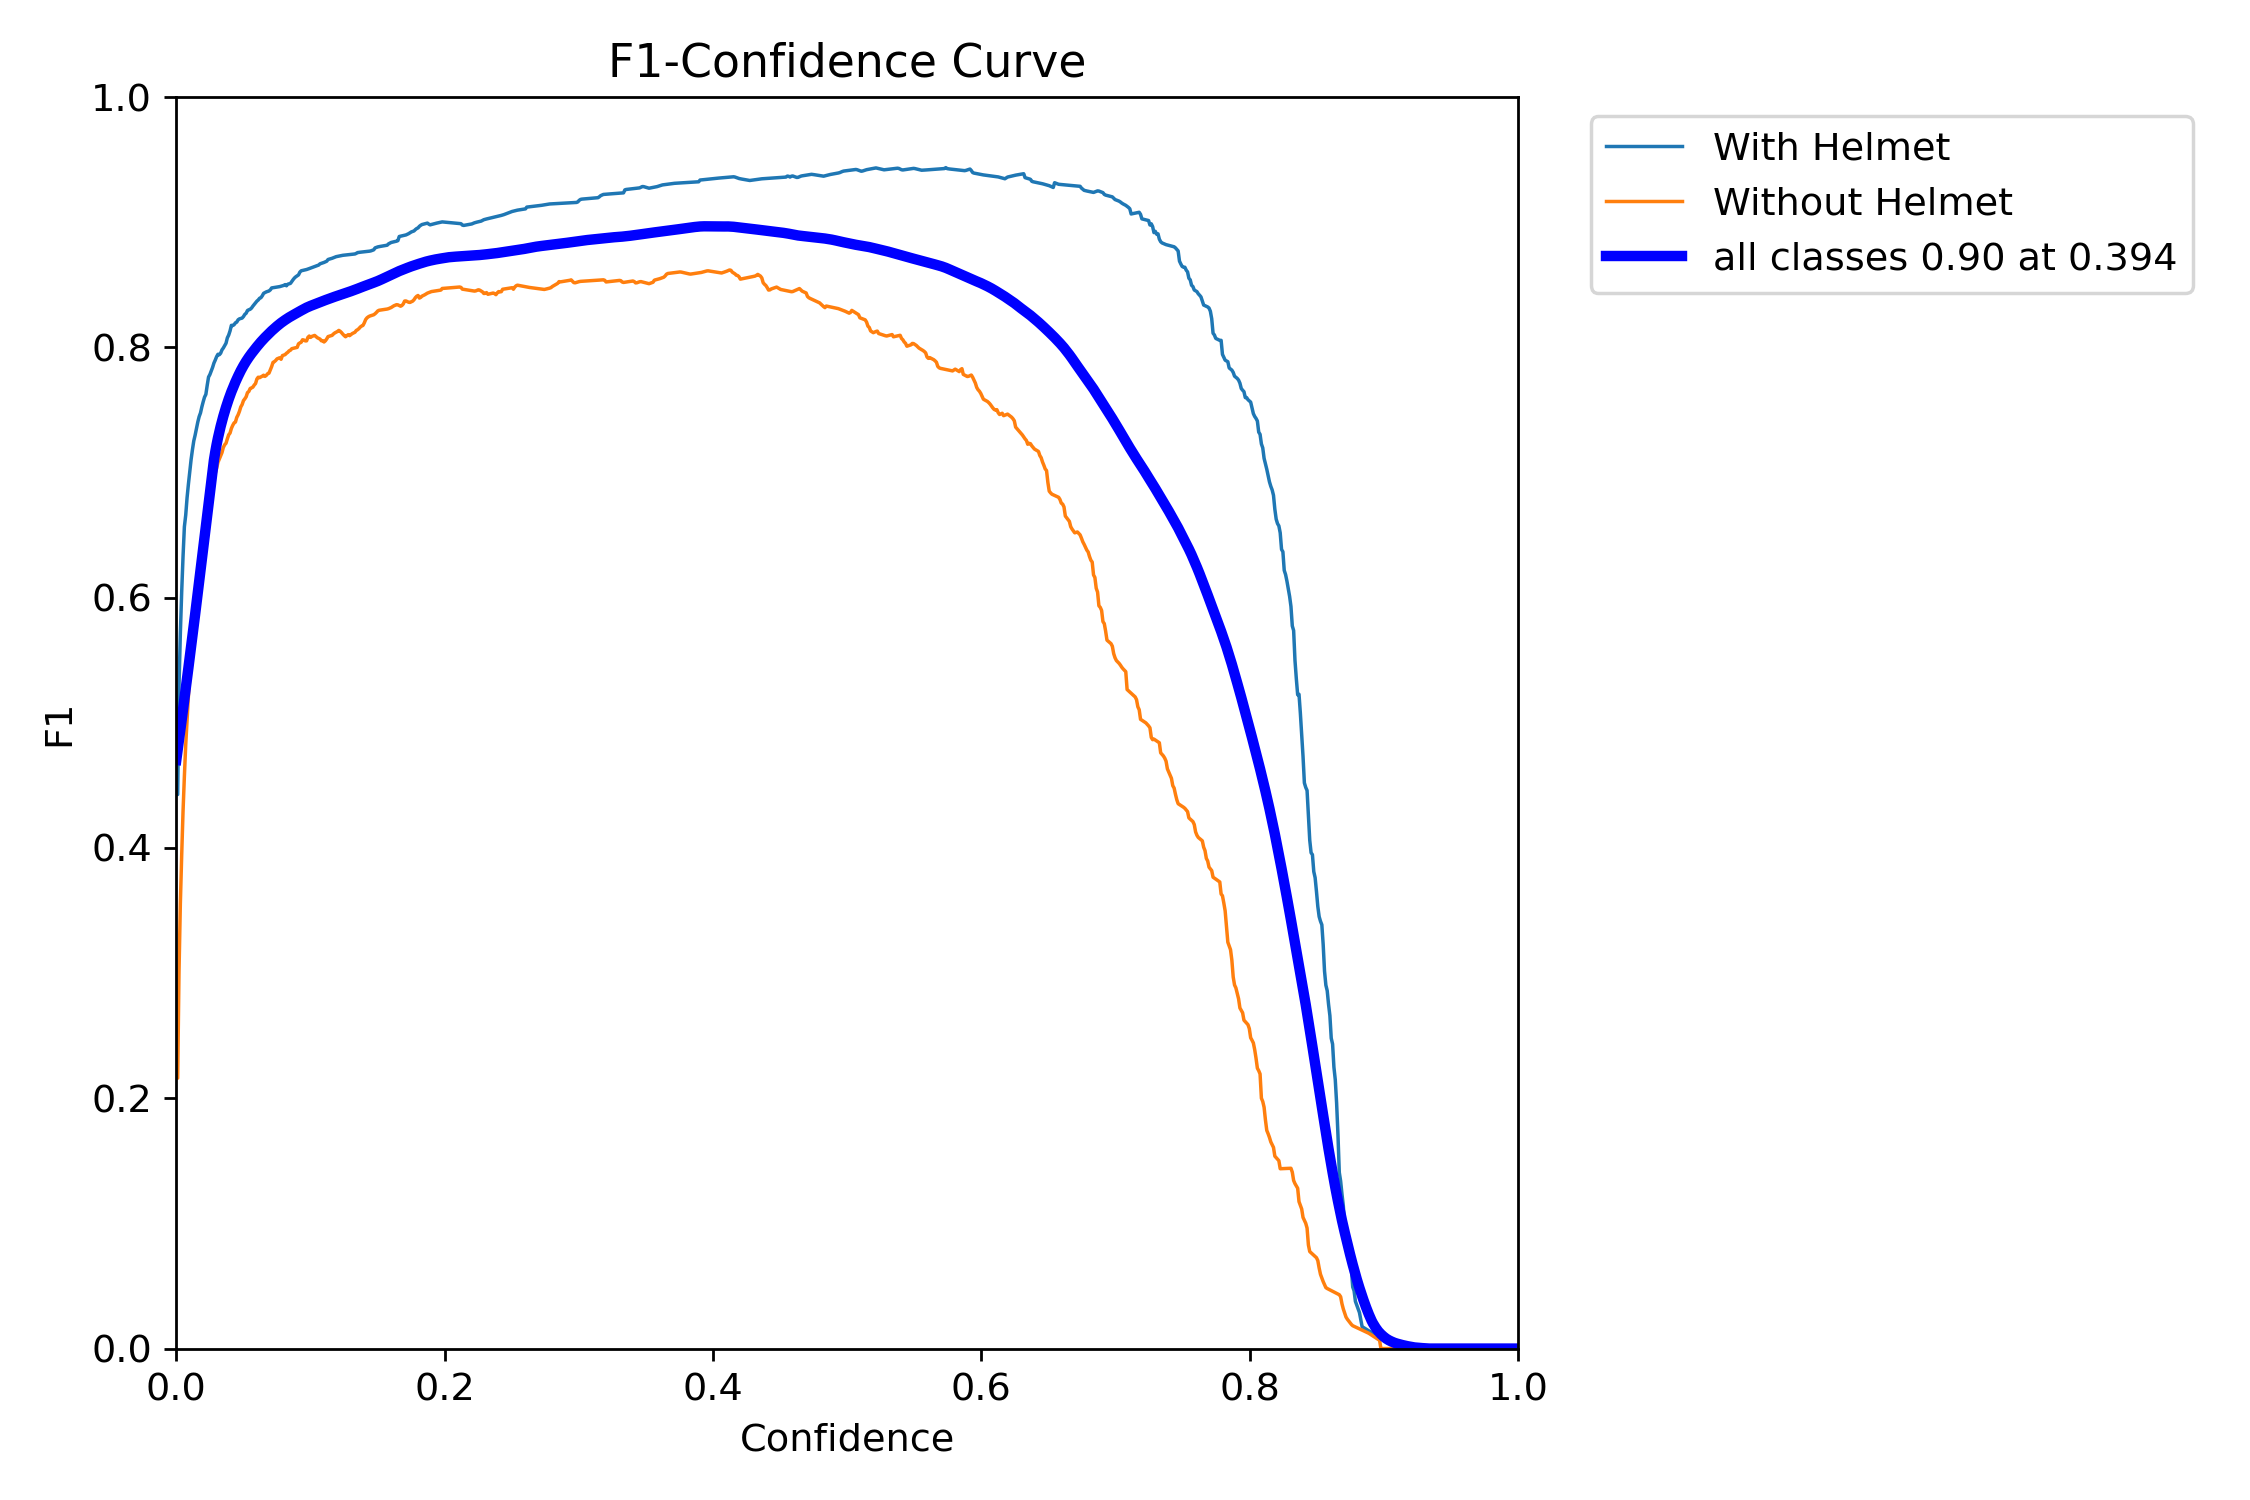

In [ ]:
Image(filename = os.path.join(results_path,'F1_curve.png'),width =700,height = 500)

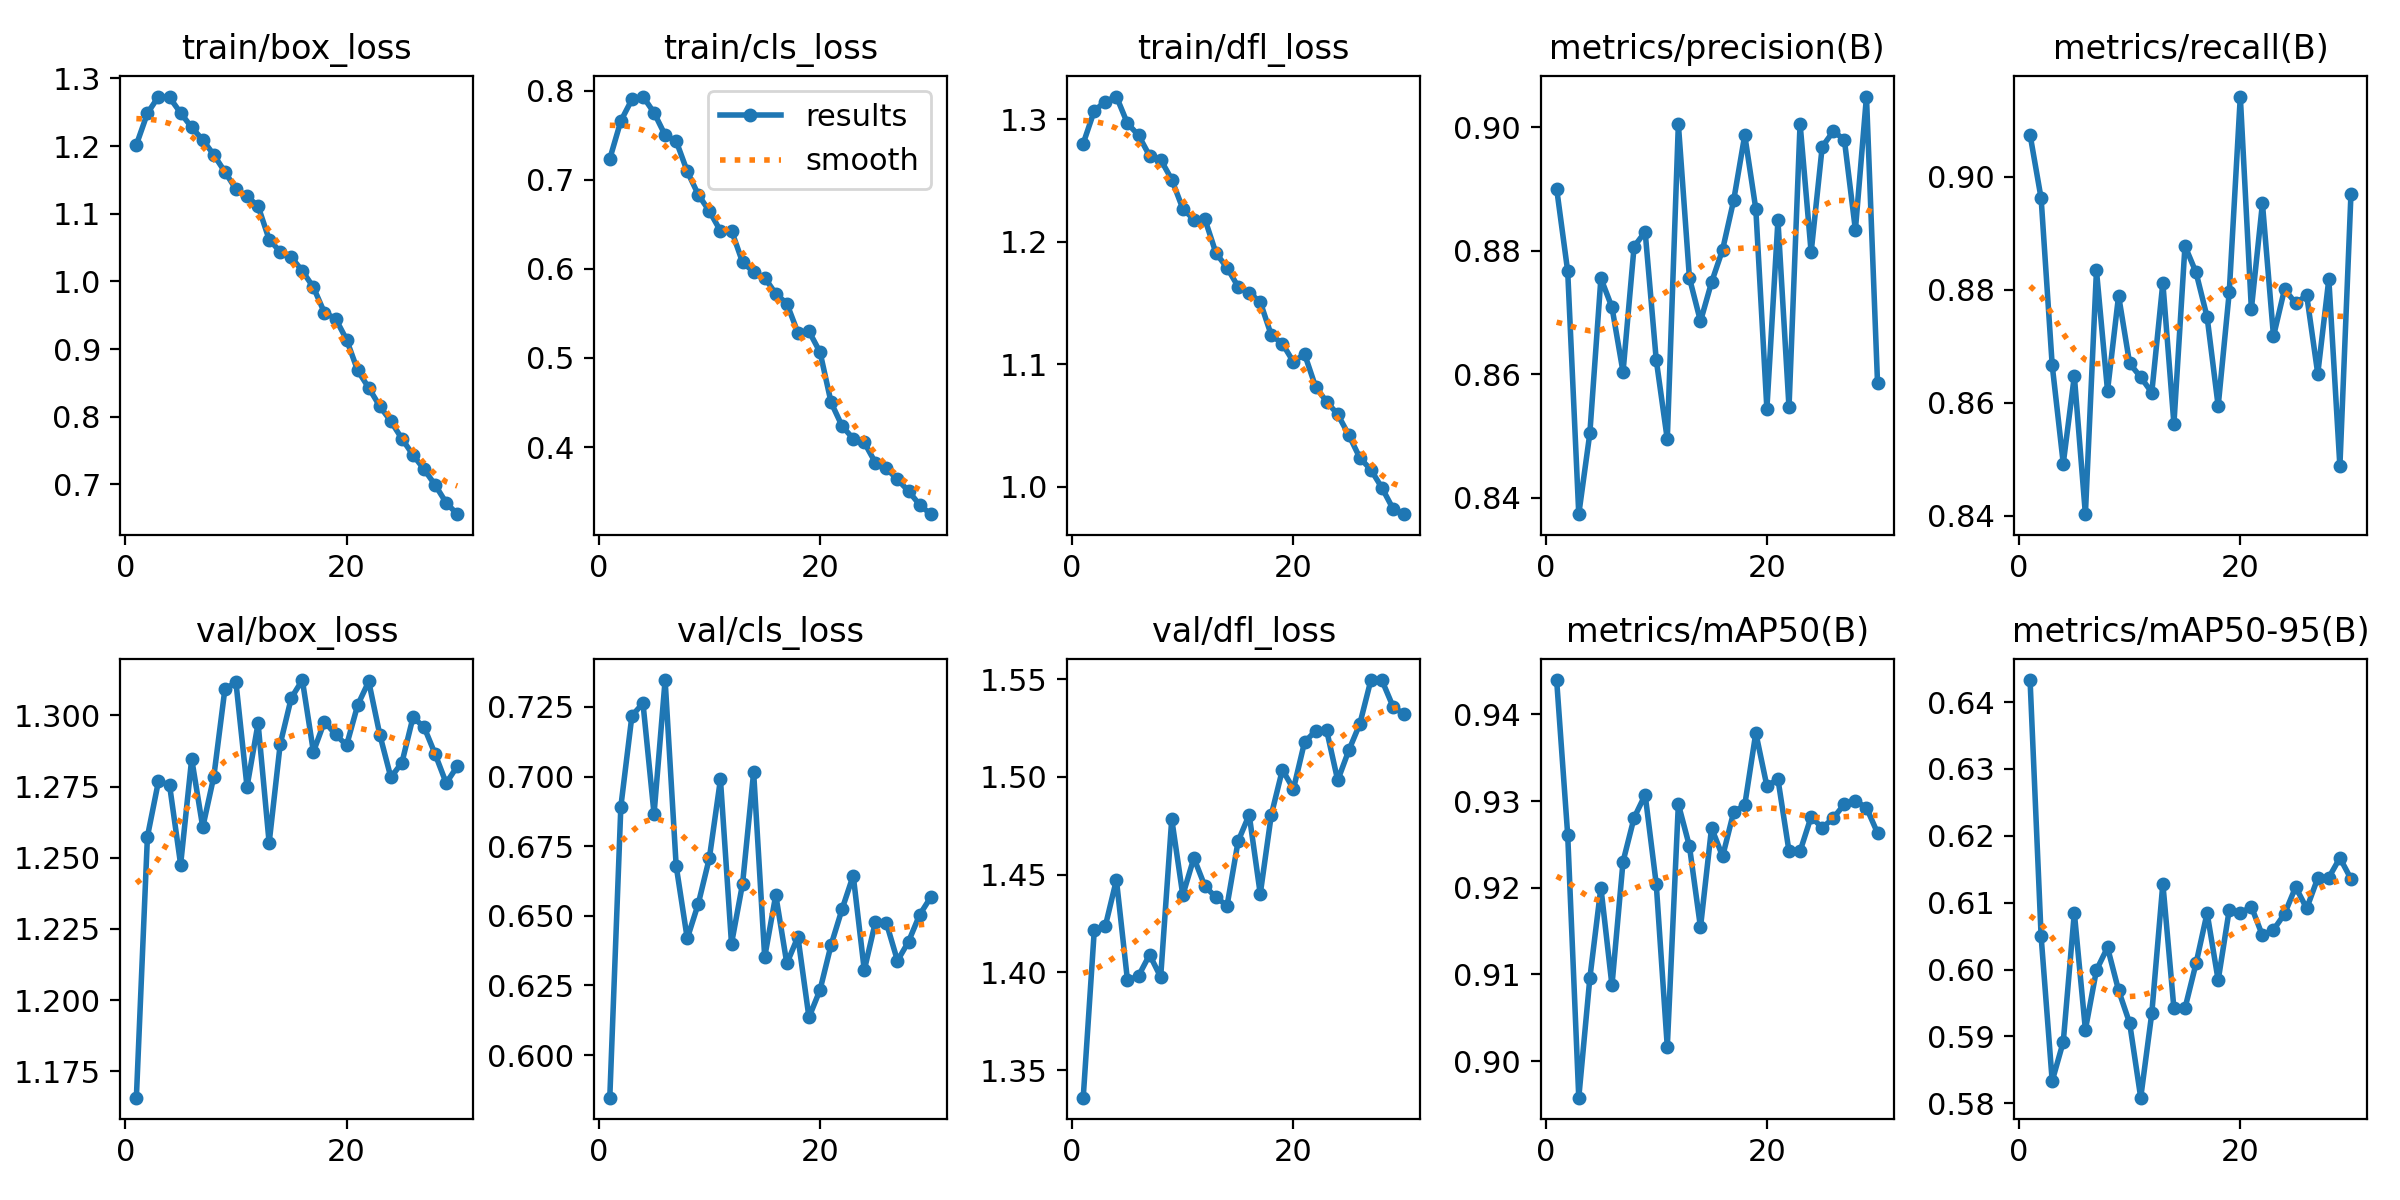

In [ ]:
Image(filename = os.path.join(results_path,'results.png'),width =900,height = 500)

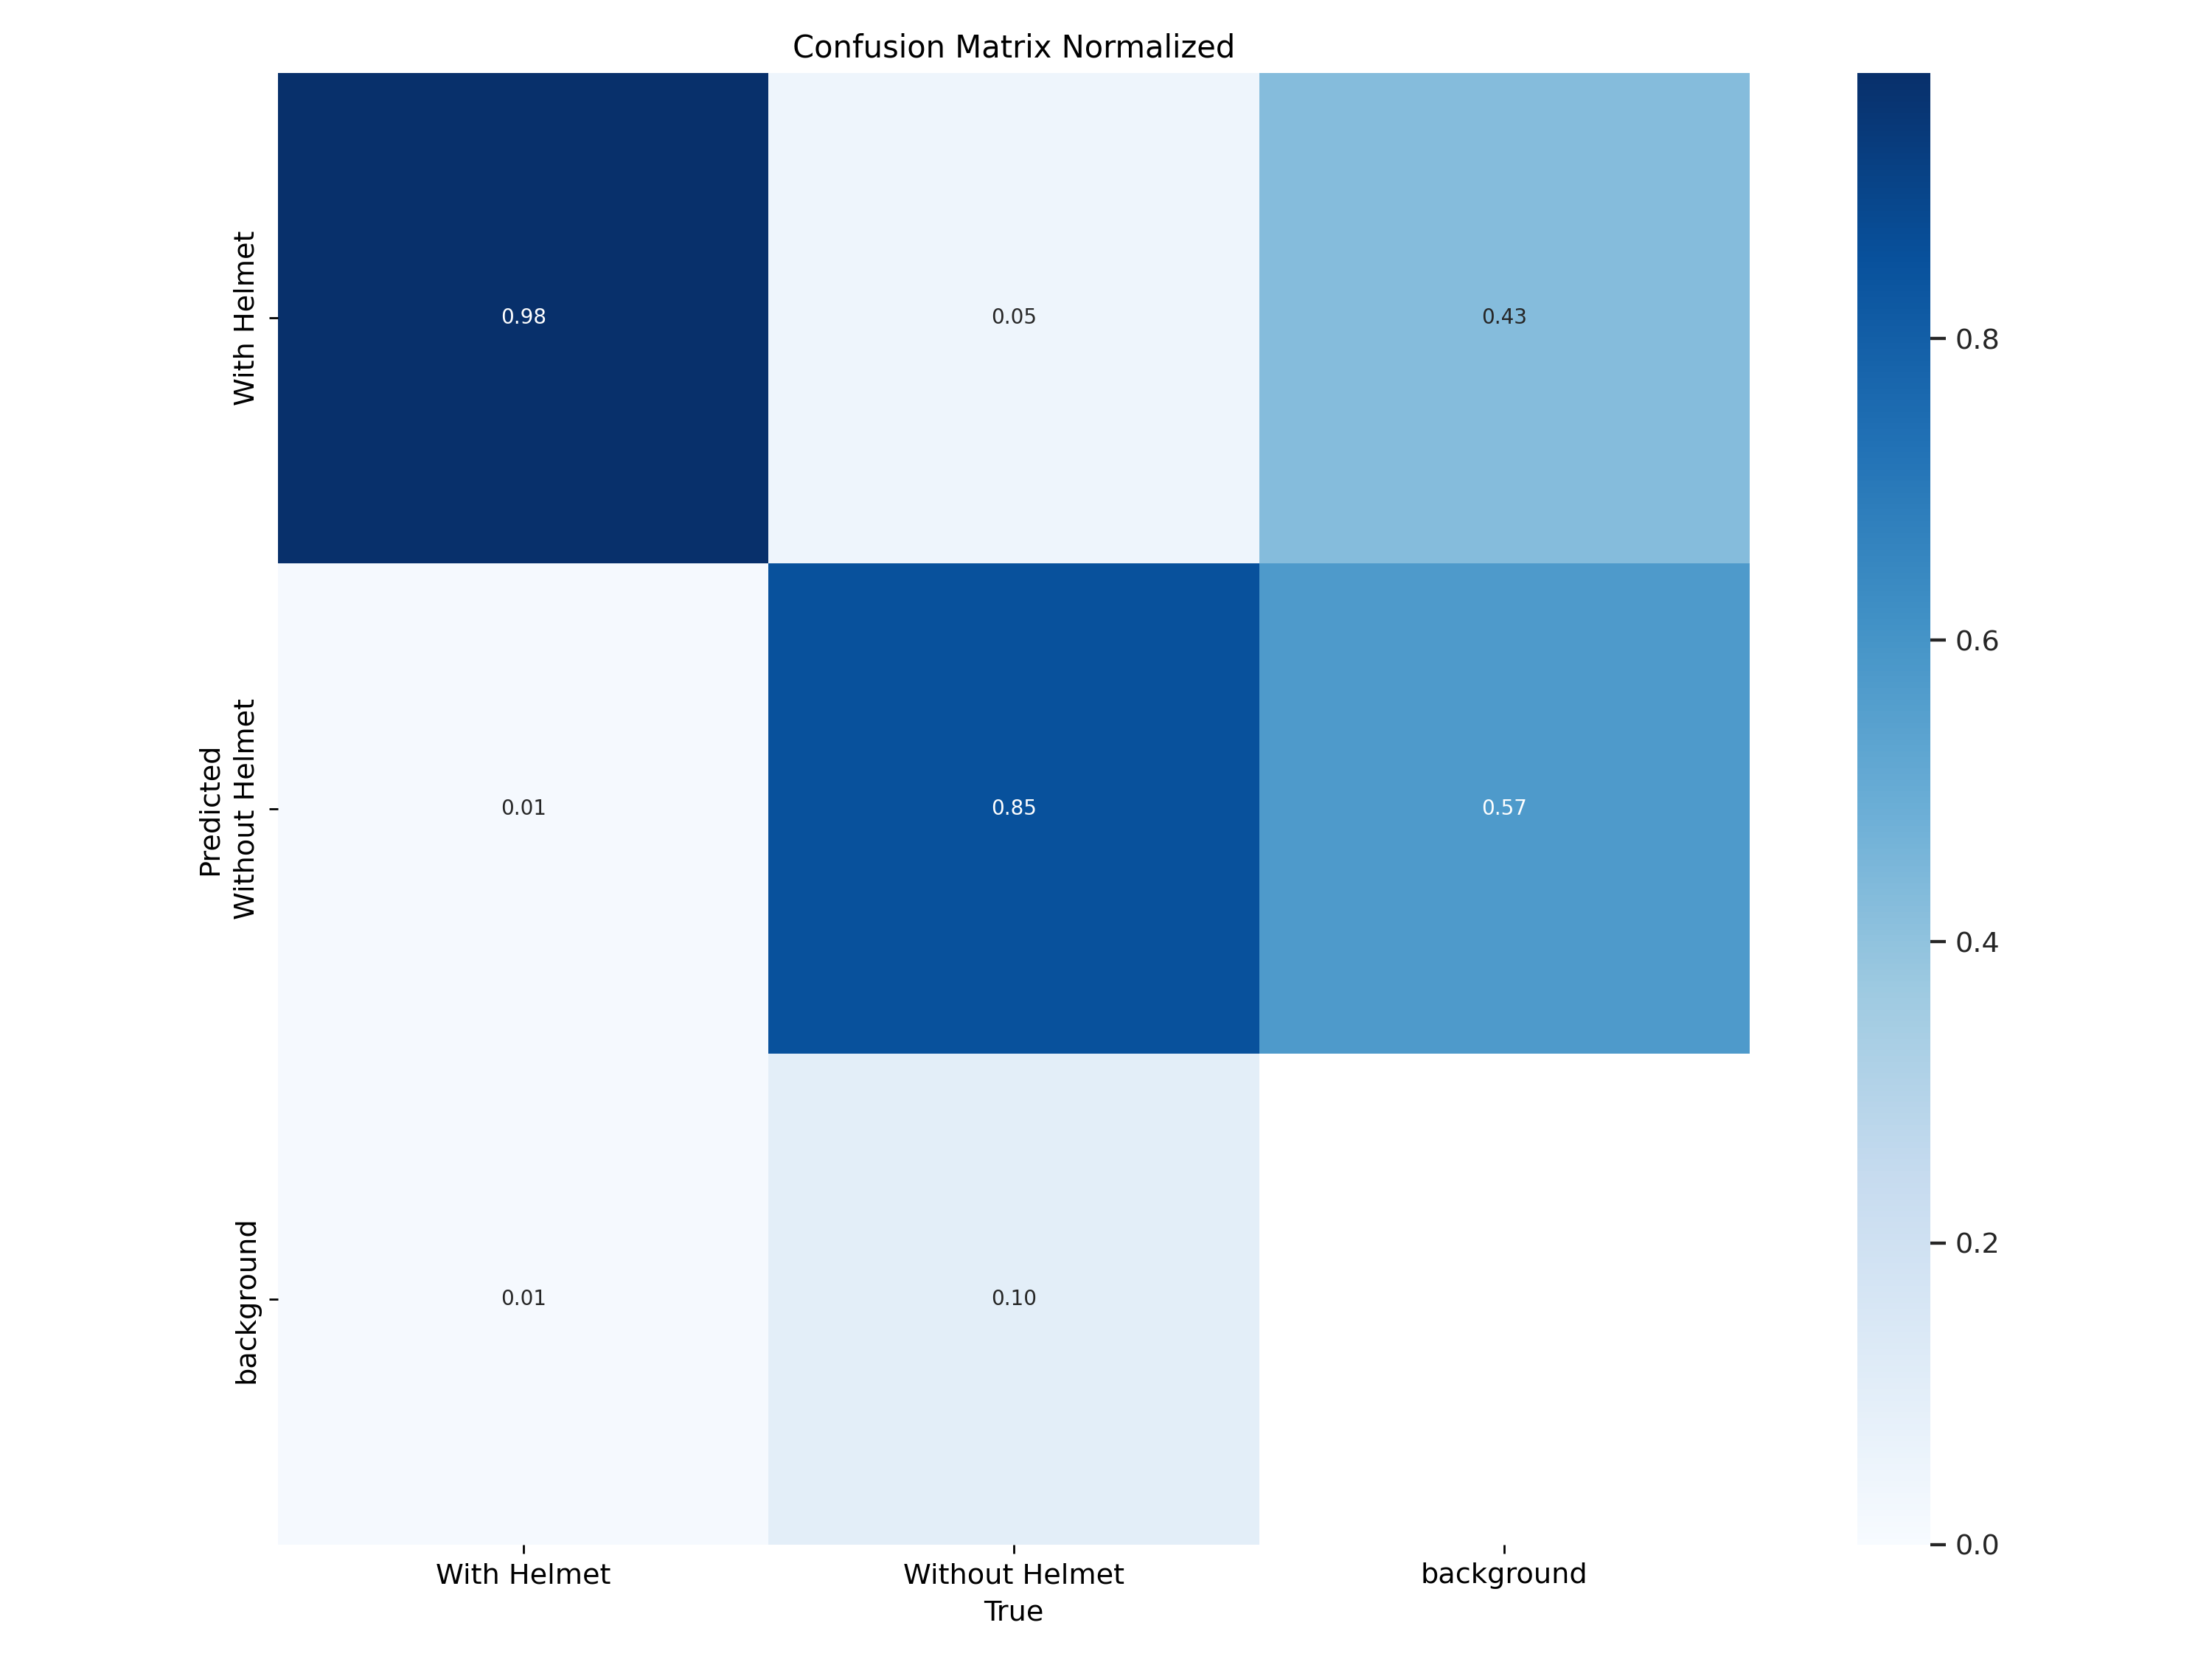

In [ ]:
Image(filename = os.path.join(results_path,'confusion_matrix_normalized.png'),width =700,height = 500)